<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/3501-3550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

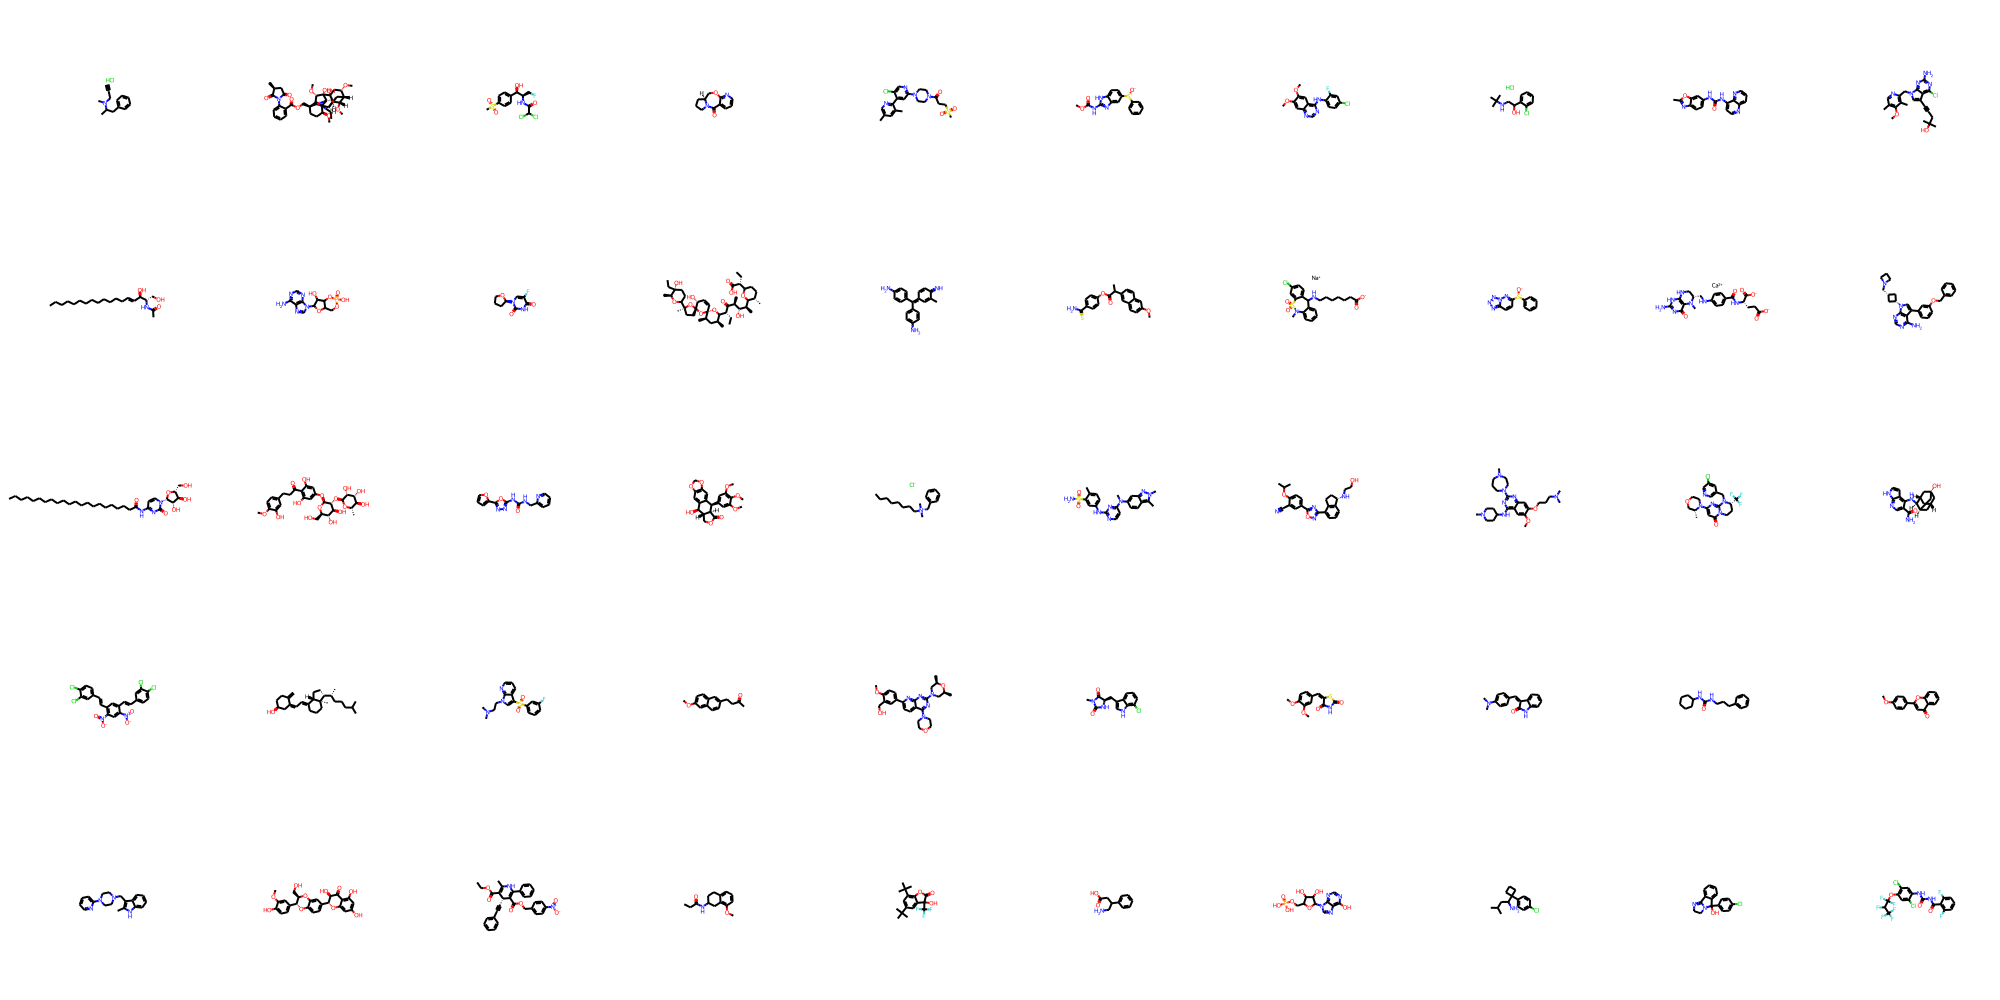

In [3]:
smiles_list = [

'C#CCN(C)C(C)Cc1ccccc1.Cl',
'CCN1C[C@]2(COC(=O)c3ccccc3N3C(=O)C[C@H](C)C3=O)CC[C@H](OC)[C@]34C2[C@H](OC)[C@](O)([C@H]13)[C@@]1(O)C[C@H](OC)[C@H]2C[C@@H]4[C@@H]1[C@H]2OC',
'CS(=O)(=O)c1ccc([C@@H](O)[C@@H](CF)NC(=O)C(Cl)Cl)cc1',
'O=C1c2cccnc2OC[C@@H]2CCCN12',
'Cc1cnc(-c2cc(N3CCN(C(=O)CCS(C)(=O)=O)CC3)ncc2Cl)c(C)c1',
'COC(=O)Nc1nc2cc([S+]([O-])c3ccccc3)ccc2[nH]1',
'COc1cc2ncnc(Nc3ccc(Cl)cc3F)c2cc1OC',
'CC(C)(C)NCC(O)c1ccccc1Cl.Cl',
'Cc1nc2ccc(NC(=O)Nc3ccnc4cccnc34)cc2o1',
'COc1c(C)cnc(Cn2cc(C#CCC(C)(C)O)c3c(Cl)nc(N)nc32)c1C',
'CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO)NC(C)=O',
'Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O',
'O=c1[nH]c(=O)n([C@H]2CCCO2)cc1F',
'CC[C@@H](C(=O)O)C1CC[C@H](C)C([C@@H](C)[C@H](O)[C@H](C)C(=O)[C@H](CC)C2O[C@]3(C=C[C@@H](O)[C@]4(CC[C@@](C)(C5CC[C@](O)(CC)[C@H](C)O5)O4)O3)[C@H](C)C[C@@H]2C)O1',
'CC1=CC(=C(c2ccc(N)cc2)c2ccc(N)cc2)C=CC1=N',
'COc1ccc2cc(C(C)C(=O)Oc3ccc(C(N)=S)cc3)ccc2c1',
'CN1c2ccccc2C(NCCCCCCC(=O)[O-])c2ccc(Cl)cc2S1(=O)=O.[Na+]',
'[O-][S+](c1ccccc1)c1ccc2nnnn2n1',
'CN1c2c([nH]c(N)nc2=O)NC[C@@H]1CNc1ccc(C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-])cc1.[Ca+2]',
'Nc1ncnc2c1c(-c1cccc(OCc3ccccc3)c1)cn2[C@H]1C[C@@H](CN2CCC2)C1',
'CCCCCCCCCCCCCCCCCCCCCC(=O)Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@@H]2O)c(=O)n1',
'COc1ccc(CCC(=O)c2c(O)cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O[C@@H]3O[C@@H](C)[C@H](O)[C@@H](O)[C@H]3O)cc2O)cc1O',
'O=C(NCc1ccccn1)Nc1nnc(-c2ccco2)o1',
'COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[C@H]23)OCO4)cc(OC)c1OC',
'CCCCCCCC[N+](C)(C)Cc1ccccc1.[Cl-]',
'Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O',
'CC(C)Oc1ccc(-c2nc(-c3cccc4c3CC[C@@H]4NCCO)no2)cc1C#N',
'COc1cc2c(NC3CCN(C)CC3)nc(N3CCCN(C)CC3)nc2cc1OCCCN(C)C',
'C[C@@H]1COCCN1c1cc(=O)n2c(n1)N(Cc1cncc(Cl)c1)[C@H](C(F)(F)F)CC2',
'NC(=O)c1cnc2[nH]ccc2c1N[C@H]1[C@H]2C[C@H]3C[C@@H]1C[C@](O)(C3)C2',
'O=[N+]([O-])c1cc([N+](=O)[O-])c(/C=C/c2ccc(Cl)c(Cl)c2)cc1/C=C/c1ccc(Cl)c(Cl)c1',
'C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@@]2(C)[C@H]1CC[C@@H]2[C@H](C)CCCC(C)C',
'CN(C)CCn1cc(S(=O)(=O)c2cccc(F)c2)c2cccnc21',
'COc1ccc2cc(CCC(C)=O)ccc2c1',
'COc1ccc(-c2ccc3c(N4CCOCC4)nc(N4C[C@H](C)O[C@H](C)C4)nc3n2)cc1CO',
'CN1C(=O)N[C@H](Cc2c[nH]c3c(Cl)cccc23)C1=O',
'COc1ccc(/C=C2/SC(=O)NC2=O)cc1OC',
'CN(C)c1ccc(/C=C2\C(=O)Nc3ccccc32)cc1',
'O=C(NCCCc1ccccc1)NC1CCCCC1',
'COc1ccc(-c2cc(=O)c3ccccc3o2)cc1',
'Cc1[nH]c2ccccc2c1CN1CCN(c2ccccn2)CC1',
'COc1cc([C@H]2Oc3ccc([C@H]4Oc5cc(O)cc(O)c5C(=O)[C@@H]4O)cc3O[C@@H]2CO)ccc1O',
'CCOC(=O)C1=C(C)NC(c2ccccc2)=C(C(=O)OCc2ccc([N+](=O)[O-])cc2)[C@@H]1C#Cc1ccccc1',
'CCC(=O)NC1CCc2cccc(OC)c2C1',
'CC(C)(C)c1cc(C(C)(C)C)c2c(c1)C(O)(C(F)(F)F)C(=O)O2',
'NCC(CC(=O)O)c1ccccc1',
'O=P(O)(O)OCC1OC(n2cnc3c(O)ncnc32)C(O)C1O',
'CC(C)CC(N)C1(c2ccc(Cl)cc2)CCC1',
'OC1(c2ccc(Cl)cc2)c2ccccc2C2=NCCN21',
'O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(OC(F)(F)C(F)C(F)(F)F)cc1Cl',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



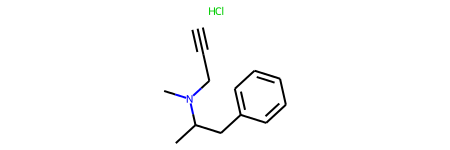

In [4]:
M1 = mol_list [0]
M1

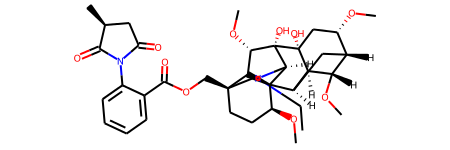

In [5]:
M2 = mol_list [1]
M2

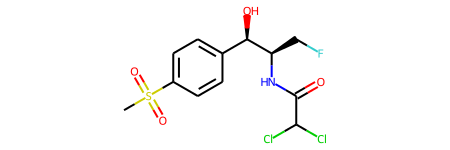

In [6]:
M3 = mol_list [2]
M3

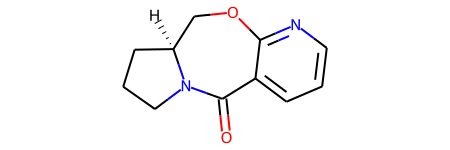

In [7]:
M4 = mol_list [3]
M4

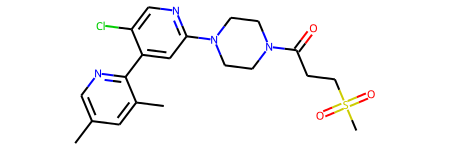

In [8]:
M5 = mol_list [4]
M5

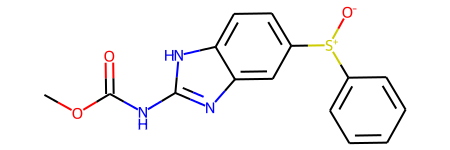

In [9]:
M6 = mol_list [5]
M6

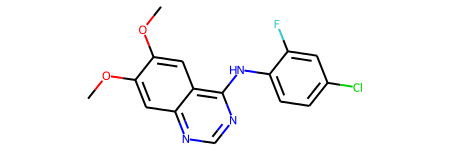

In [10]:
M7 = mol_list [6]
M7

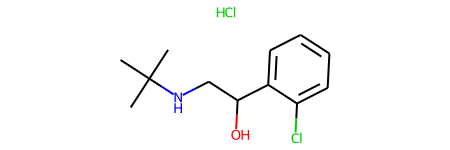

In [11]:
M8 = mol_list [7]
M8

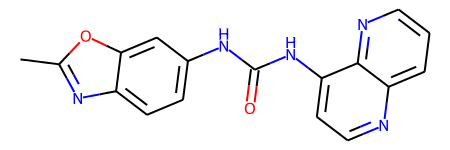

In [12]:
M9 = mol_list [8]
M9

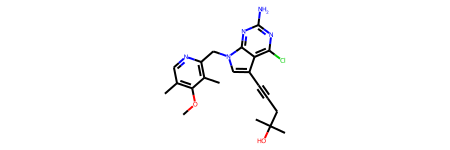

In [13]:
M10 = mol_list [9]
M10

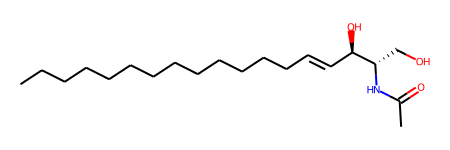

In [14]:
M11 = mol_list [10]
M11

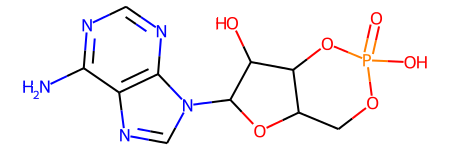

In [15]:
M12 = mol_list [11]
M12

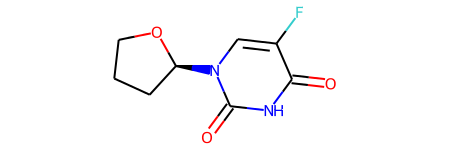

In [16]:
M13 = mol_list [12]
M13

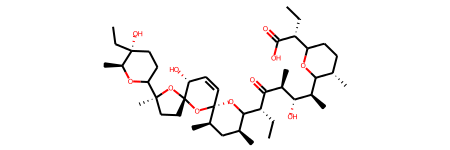

In [17]:
M14 = mol_list [13]
M14

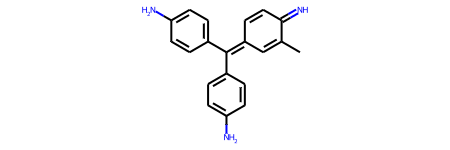

In [18]:
M15 = mol_list [14]
M15

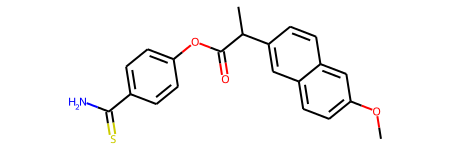

In [19]:
M16 = mol_list [15]
M16

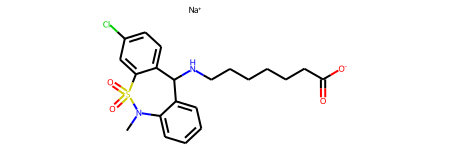

In [20]:
M17 = mol_list [16]
M17

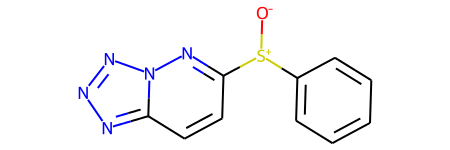

In [21]:
M18 = mol_list [17]
M18

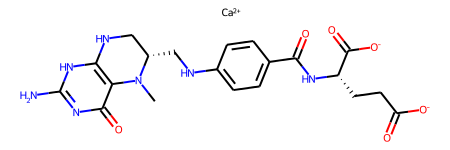

In [22]:
M19 = mol_list [18]
M19

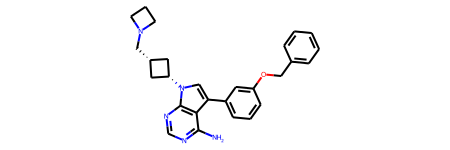

In [23]:
M20 = mol_list [19]
M20

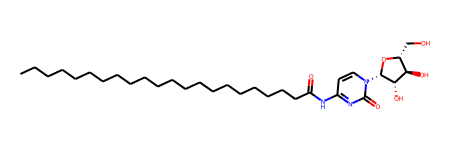

In [24]:
M21 = mol_list [20]
M21

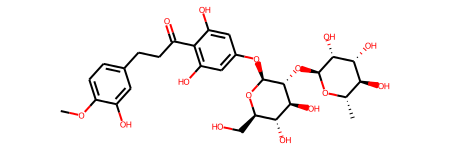

In [25]:
M22 = mol_list [21]
M22

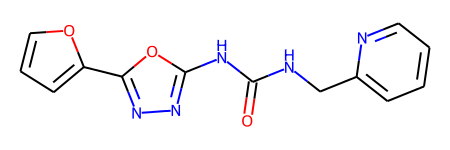

In [26]:
M23 = mol_list [22]
M23

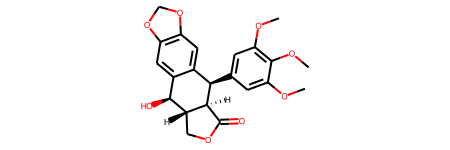

In [27]:
M24 = mol_list [23]
M24

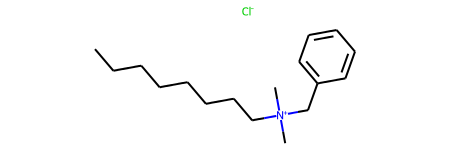

In [28]:
M25 = mol_list [24]
M25

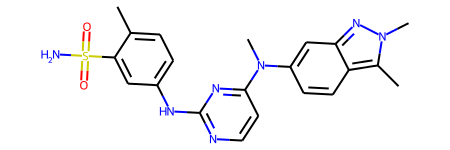

In [29]:
M26 = mol_list [25]
M26

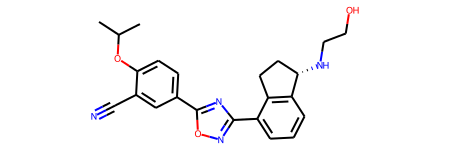

In [30]:
M27 = mol_list [26]
M27

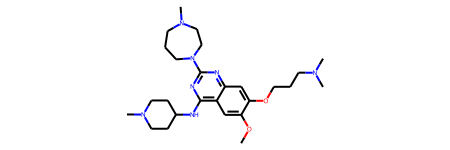

In [31]:
M28 = mol_list [27]
M28

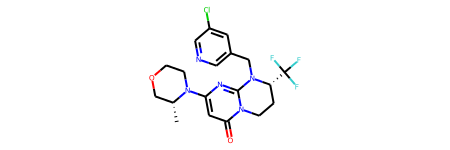

In [32]:
M29 = mol_list [28]
M29

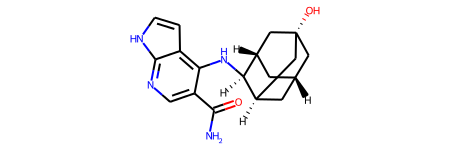

In [33]:
M30 = mol_list [29]
M30

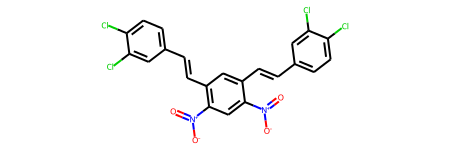

In [34]:
M31 = mol_list [30]
M31

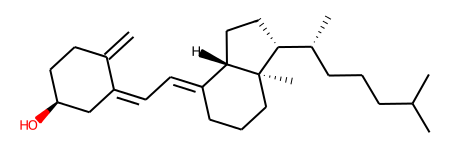

In [35]:
M32 = mol_list [31]
M32

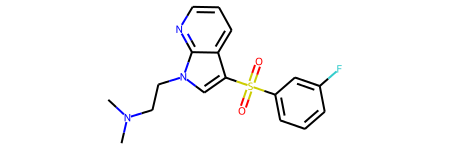

In [36]:
M33 = mol_list [32]
M33

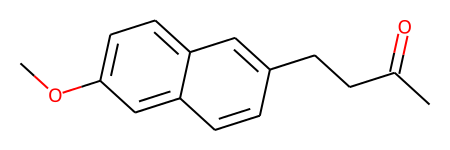

In [37]:
M34 = mol_list [33]
M34

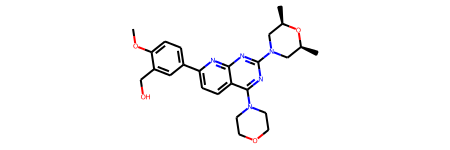

In [38]:
M35 = mol_list [34]
M35

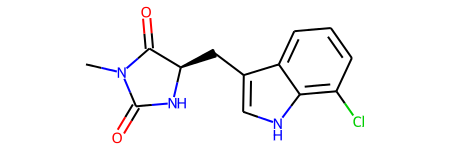

In [39]:
M36 = mol_list [35]
M36

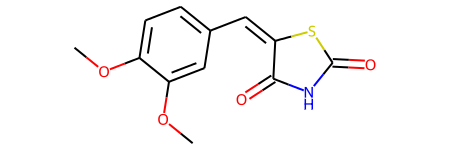

In [40]:
M37= mol_list [36]
M37

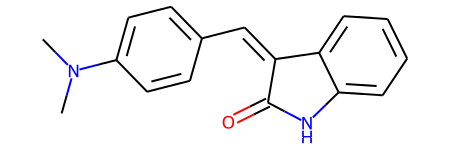

In [41]:
M38= mol_list [37]
M38

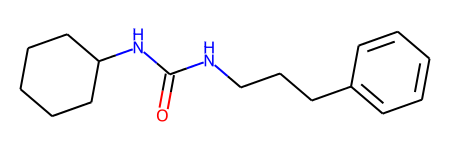

In [42]:
M39= mol_list [38]
M39

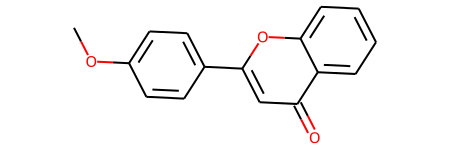

In [43]:
M40= mol_list [39]
M40

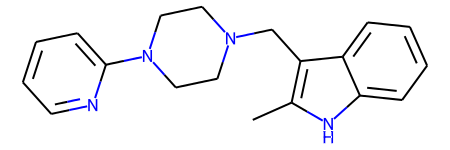

In [44]:
M41= mol_list [40]
M41

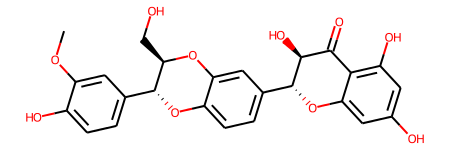

In [45]:
M42= mol_list [41]
M42

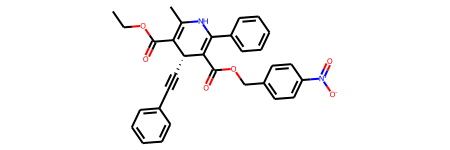

In [46]:
M43= mol_list [42]
M43

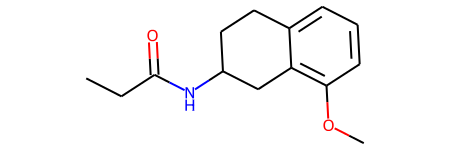

In [47]:
M44= mol_list [43]
M44

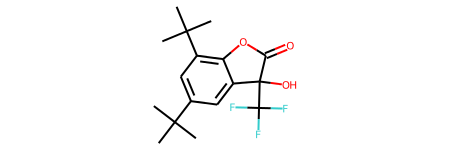

In [48]:
M45= mol_list [44]
M45

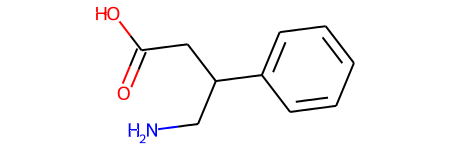

In [49]:
M46= mol_list [45]
M46

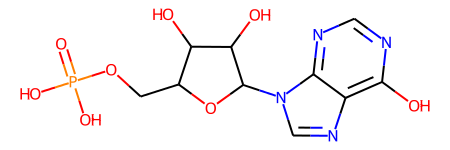

In [50]:
M47= mol_list [46]
M47

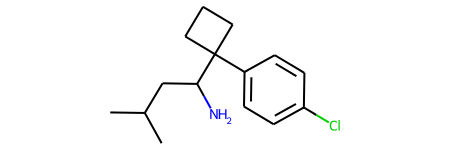

In [51]:
M48= mol_list [47]
M48

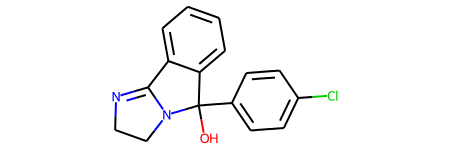

In [52]:
M49= mol_list [48]
M49

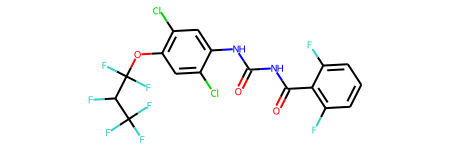

In [53]:
M50= mol_list [49]
M50